In [3]:
import pandas as pd
import numpy as np

In [4]:
file_name = 'Burgula-20160511-122000--100.csv'
df = pd.read_csv('/home/mytrah-pc/Data/Burgula/Burgula-20160511-122000--100.csv')

In [19]:
df_columns = list(df)

In [20]:
print "<Columns in the DataFrame>"
print "\n".join(df_columns)

<Columns in the DataFrame>
Machine
StartTime
EndTime
ActivePower_AVG
ActivePower_MIN
ActivePower_MAX
ActivePower_SD
Amb.NacelleTemp_AVG
Amb.NacelleTemp_MIN
Amb.NacelleTemp_MAX
Amb.NacelleTemp_SD
Amb.TopBoxTemp_AVG
Amb.TopBoxTemp_MIN
Amb.TopBoxTemp_MAX
Amb.TopBoxTemp_SD
Amb.WindSpeed10Min_AVG
Amb.WindSpeed10Min_MIN
Amb.WindSpeed10Min_MAX
Amb.WindSpeed10Min_SD
Amb.WindSpeedInstUpperLimit_AVG
Amb.WindSpeedInstUpperLimit_MIN
Amb.WindSpeedInstUpperLimit_MAX
Amb.WindSpeedInstUpperLimit_SD
Amb.WindSpeedLowerLimit_AVG
Amb.WindSpeedLowerLimit_MIN
Amb.WindSpeedLowerLimit_MAX
Amb.WindSpeedLowerLimit_SD
Amb.WindSpeedUnfiltered_AVG
Amb.WindSpeedUnfiltered_MIN
Amb.WindSpeedUnfiltered_MAX
Amb.WindSpeedUnfiltered_SD
Amb.WindSpeedUpperLimit_AVG
Amb.WindSpeedUpperLimit_MIN
Amb.WindSpeedUpperLimit_MAX
Amb.WindSpeedUpperLimit_SD
Conv.ElecAsymTotalCurr_AVG
Conv.ElecAsymTotalCurr_MIN
Conv.ElecAsymTotalCurr_MAX
Conv.ElecAsymTotalCurr_SD
Conv.ElecGridInverterCurrPh1_AVG
Conv.ElecGridInverterCurrPh1_MIN
Conv.E

In [261]:
def select_columns(list_of_words, parent_columns):
    selected_columns = parent_columns
    additional_columns = parent_columns
    for word in list_of_words:
        selected_columns = [column for column in selected_columns if word.lower() in column.lower()]
    return selected_columns

In [262]:
print "<Columns related to Average Temprature>"
print "\n".join(select_columns(list_of_words = ['temp', 'avg'], parent_columns = df_columns))

<Columns related to Average Temprature>
Amb.NacelleTemp_AVG
Amb.TopBoxTemp_AVG
Conv.GridInductorTemp_AVG
Conv.InternalCabinetTemp_AVG
Conv.RotorInductorTemp_AVG
Conv.TempGridInverterBranchVV011_AVG
Conv.TempRotorPh1_AVG
Conv.TempRotorPh2_AVG
Conv.TempRotorPh3_AVG
GB.BearingTemp_AVG
GB.OilTemp_AVG
Gen.BearingTempCS_AVG
Gen.BearingTempNCS_AVG
Gen.Winding1Temp_AVG
Gen.WindingTemp_AVG
Pwr.BusbarAreaTemp_AVG
Pwr.TempControlModule_AVG
Rotor.FilteredLow-SpeedShaftRearSensorTemp(MainShaft)_AVG
Rotor.HydrGroupOilTemp_AVG
TempOutdoor_AVG
Trf.Winding1Temp_AVG
Trf.Winding2Temp_AVG
Trf.Winding3Temp_AVG


In [263]:
required_df = df[select_columns(list_of_words = ['machine'], parent_columns = df_columns) + select_columns(list_of_words = ['temp', 'avg'], parent_columns = df_columns)]

In [264]:
import matplotlib.pyplot as plt

In [265]:
def value_per_machine_anomolies(value_list, machine_list, y_label, file_name):
    plt.figure(figsize=(25, 15))
    list_temp = value_list
    list_temp_range = range(0, len(list_temp))
    plt.plot(list_temp_range, list_temp, 'yo')
    plt.plot(list_temp_range, list_temp, '--')
    plt.ylabel(y_label)
    plt.yticks(np.arange(int(min(list_temp) - 1), int(max(list_temp) + 1), 1))
    plt_x_ticks = machine_list
    plt.xticks(range(len(plt_x_ticks)), plt_x_ticks, rotation=90)
    plt.xlabel('Machine Name')
    plt.title(str(y_label) + ' per Machine in ' + str(file_name))
    plt.grid(True)

    y_mean = np.mean(list_temp)
    y_std = np.std(list_temp)
    acceptable_range = 3 * y_std

    for a, b in zip(list_temp_range, list_temp): 
        if (b < y_mean - acceptable_range) or (b > y_mean + acceptable_range):
            plt.text(a + 0.2, b - 0.2, '<Anomoly>', color = 'r', fontsize=16)

    plt.show()

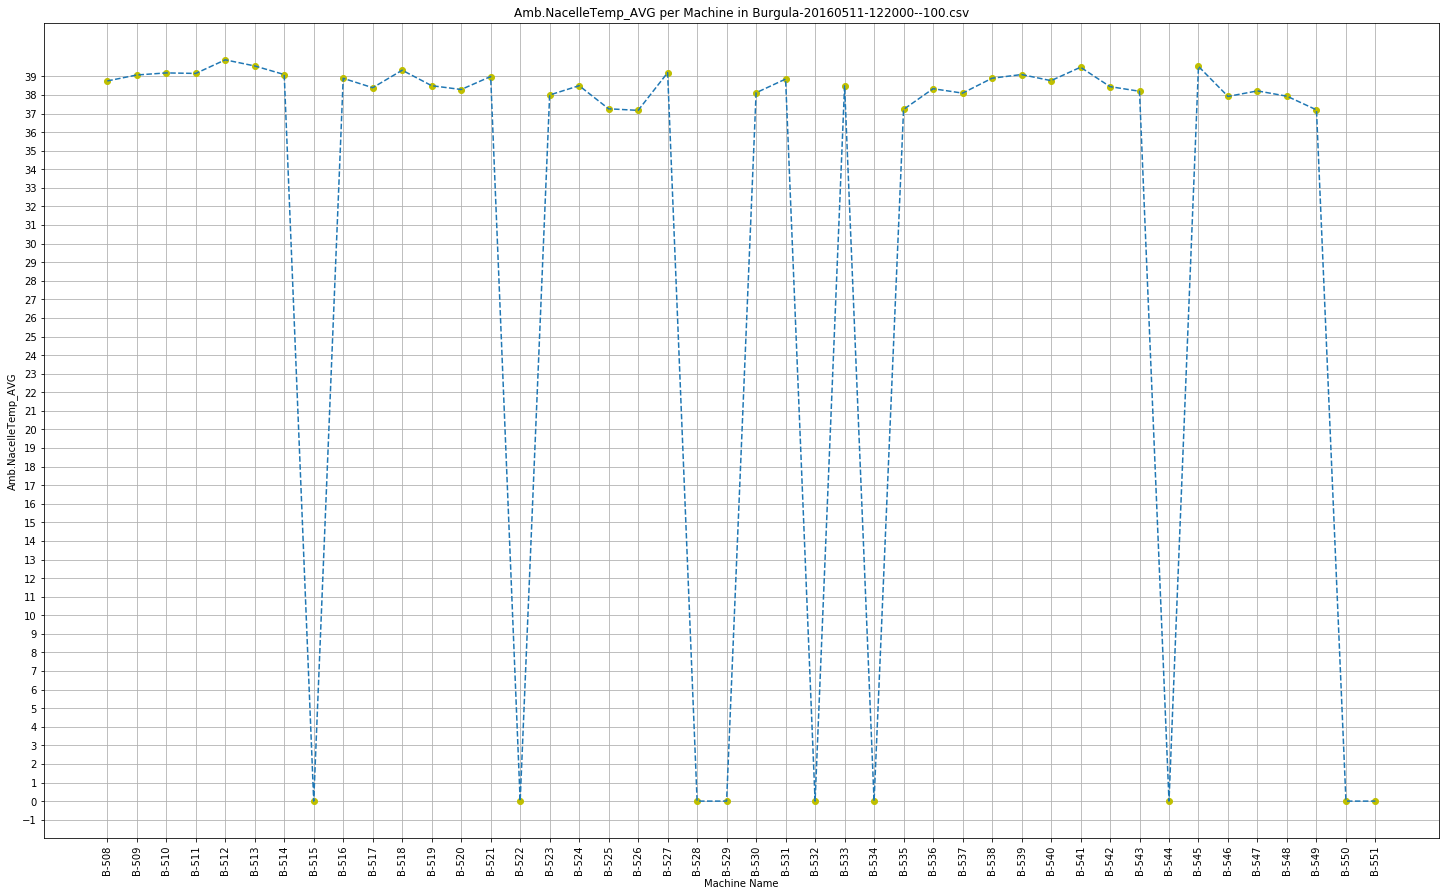

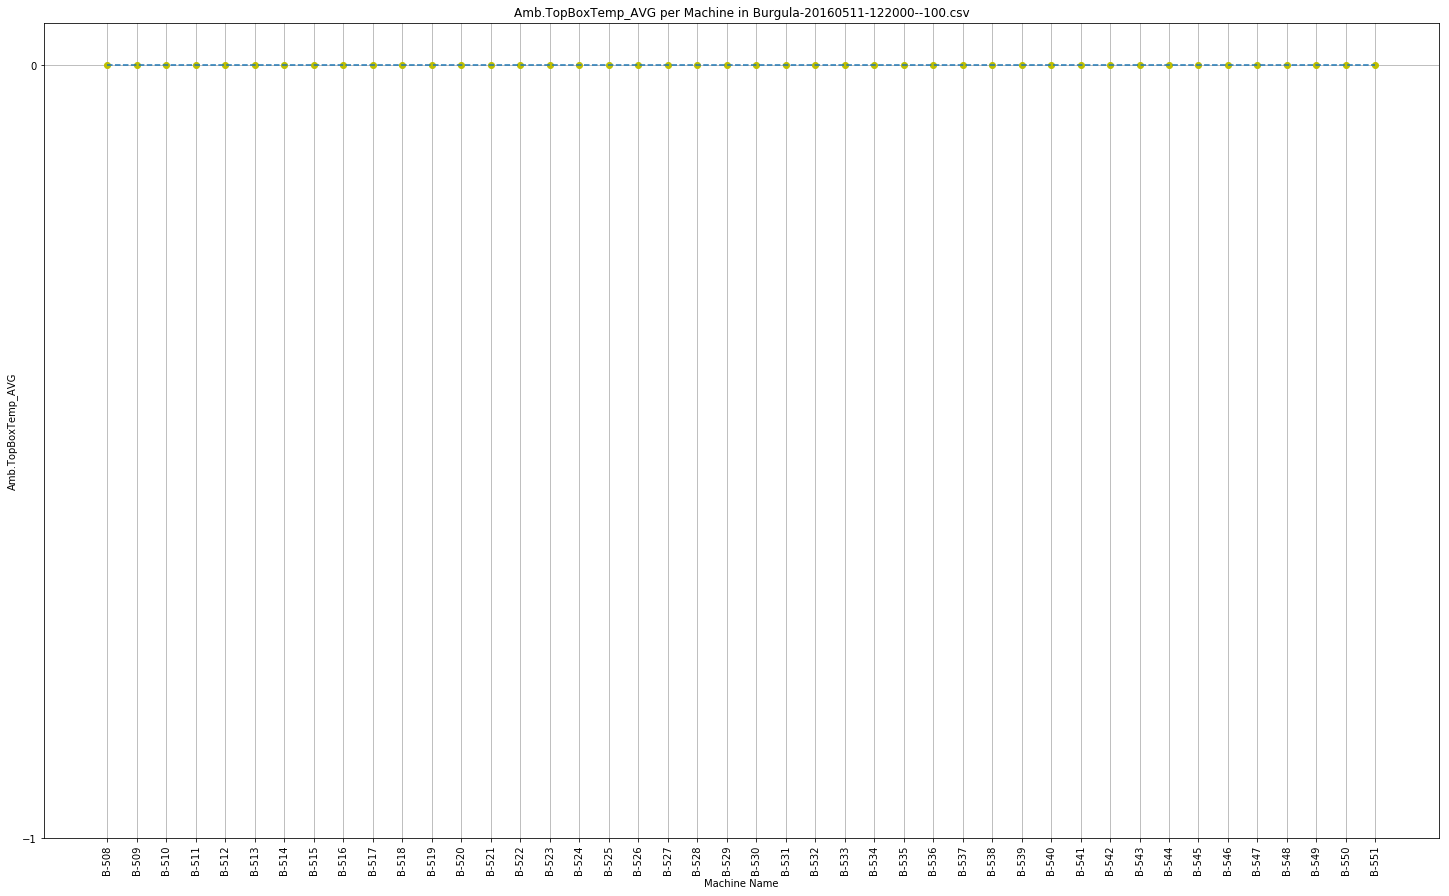

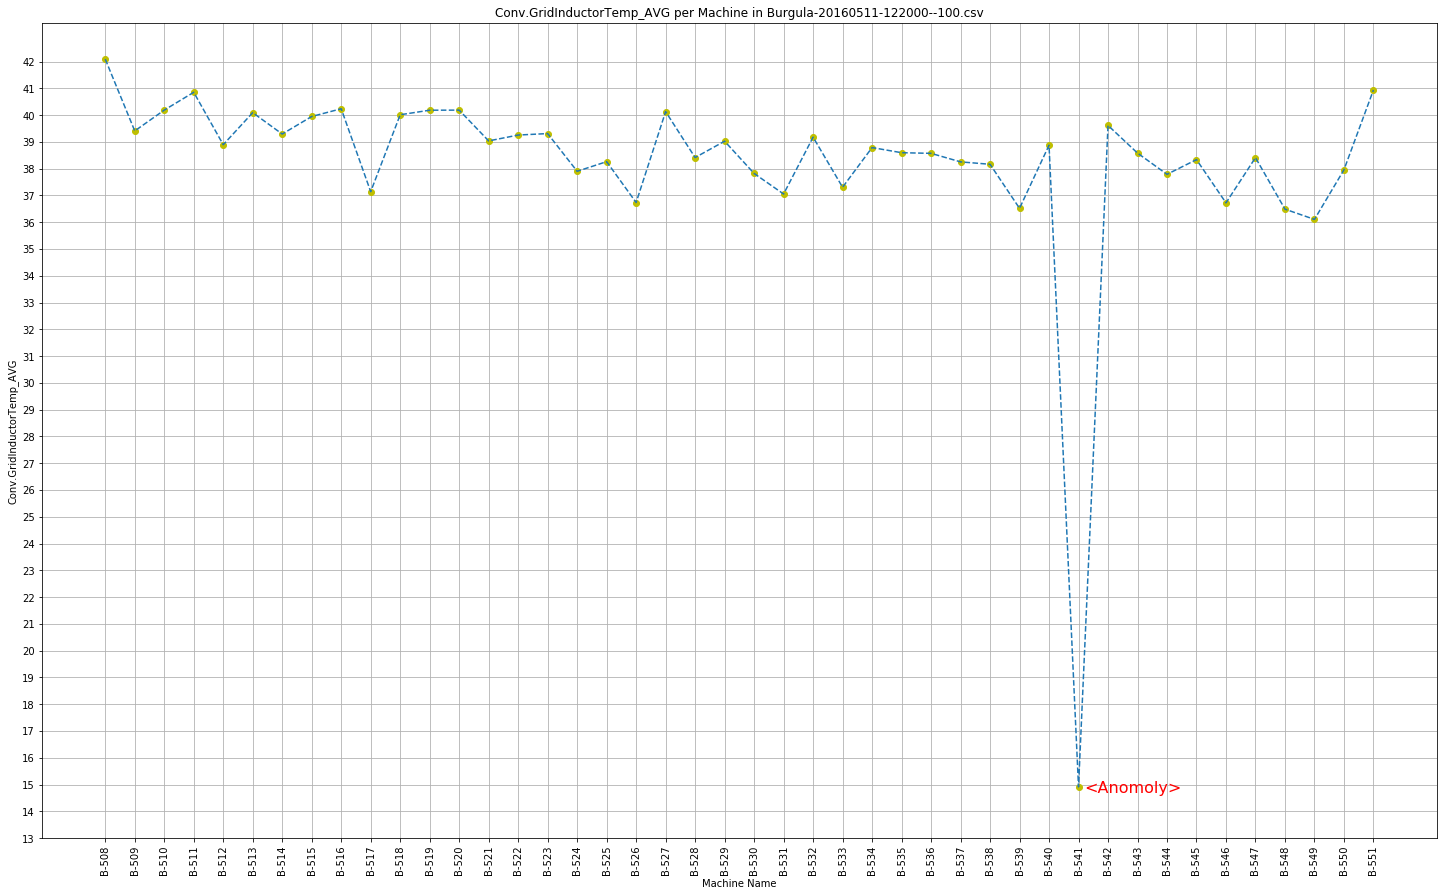

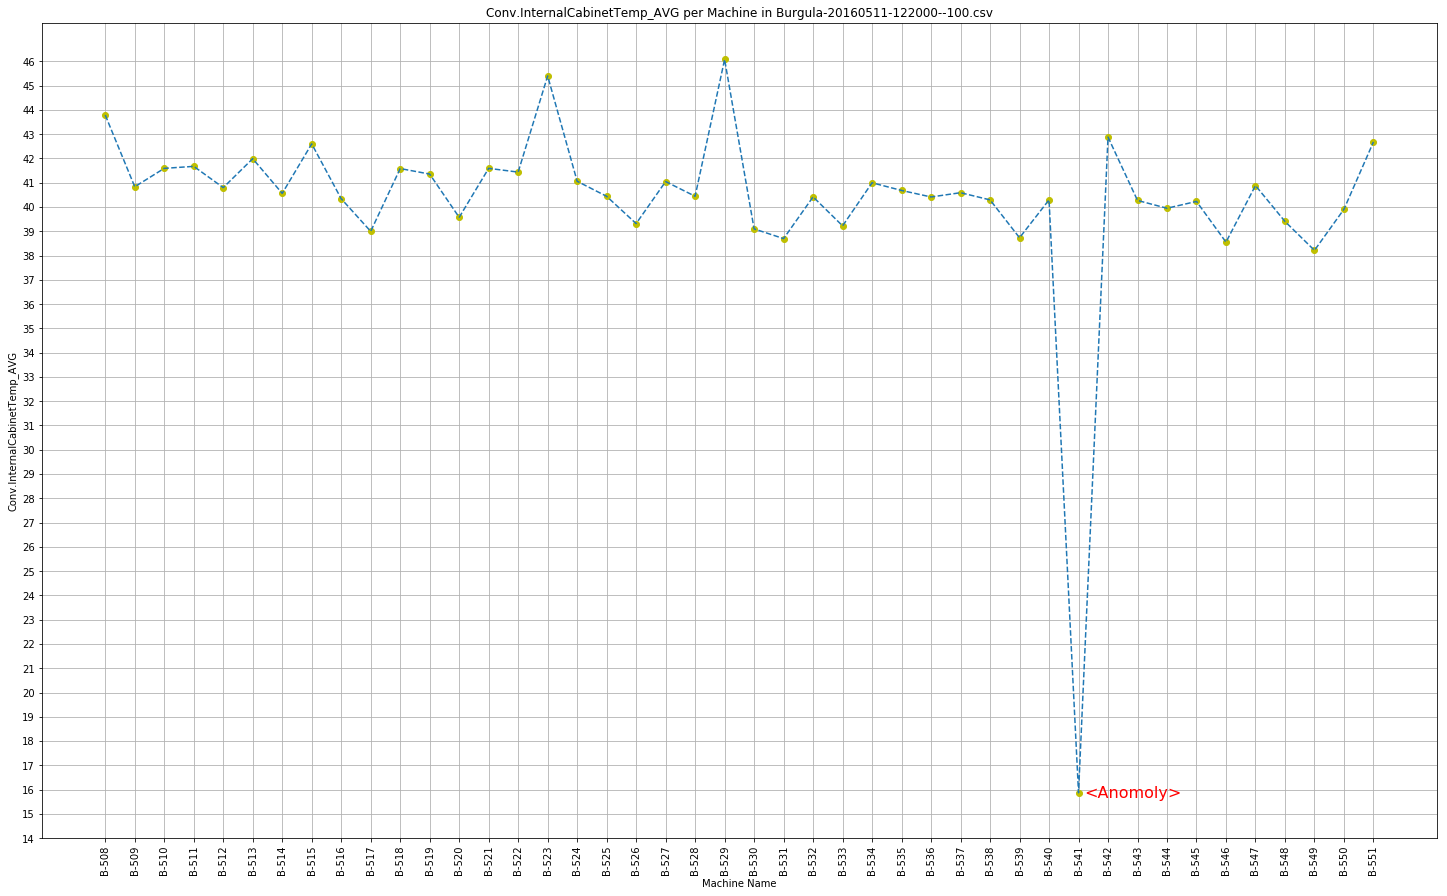

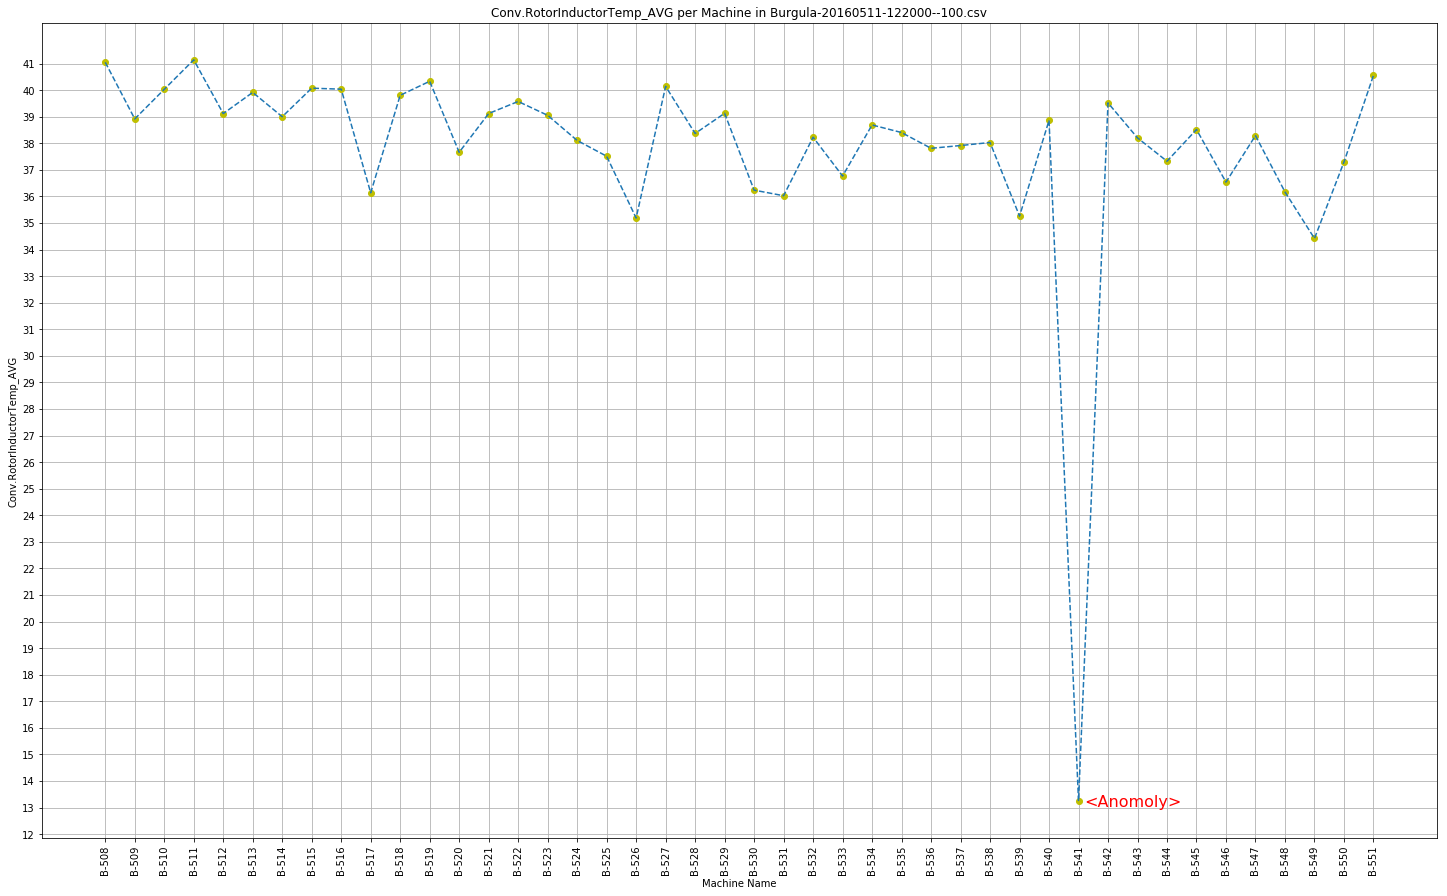

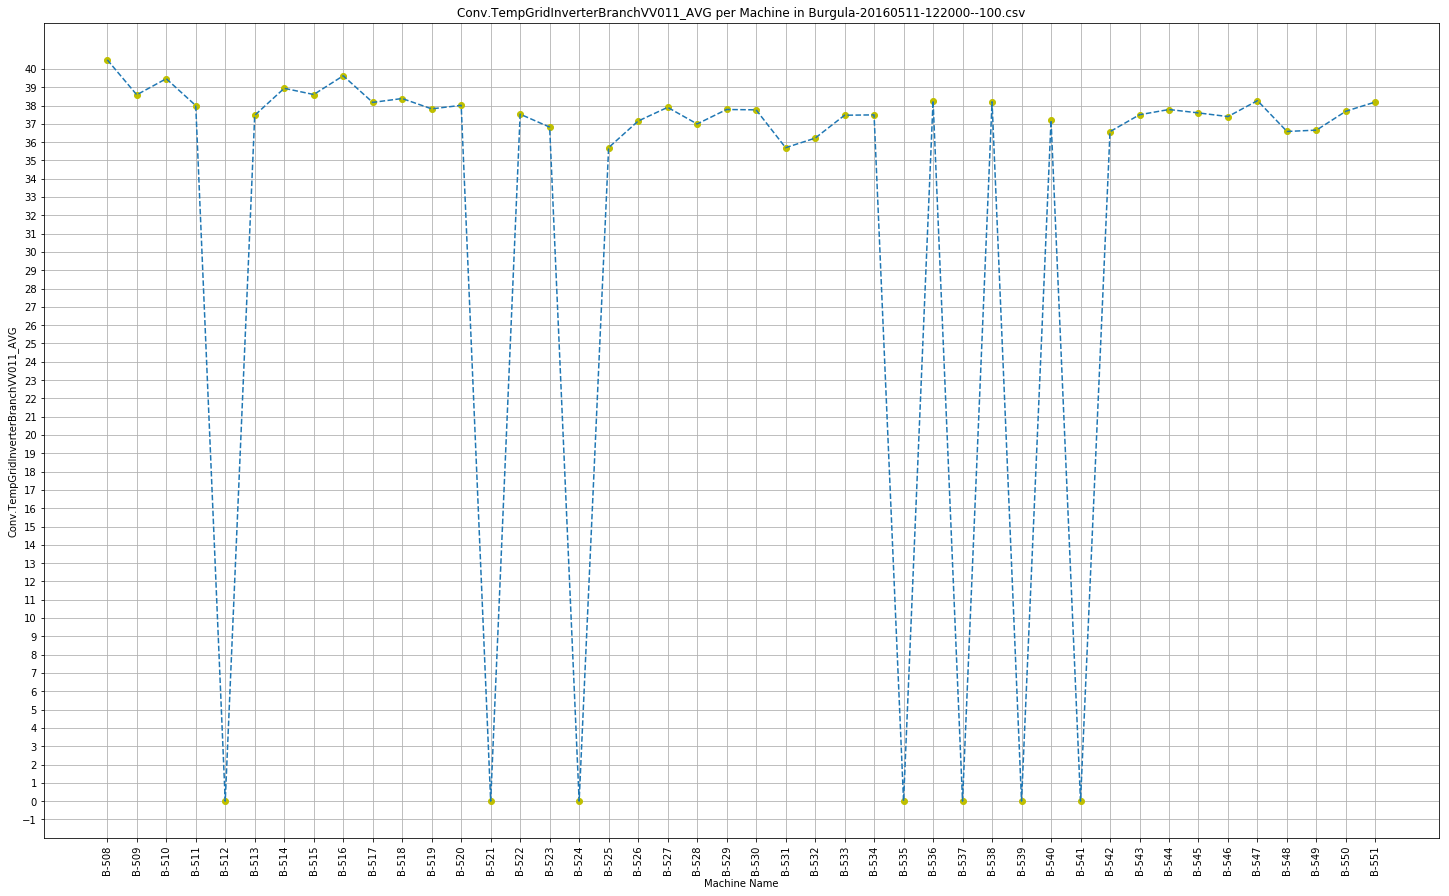

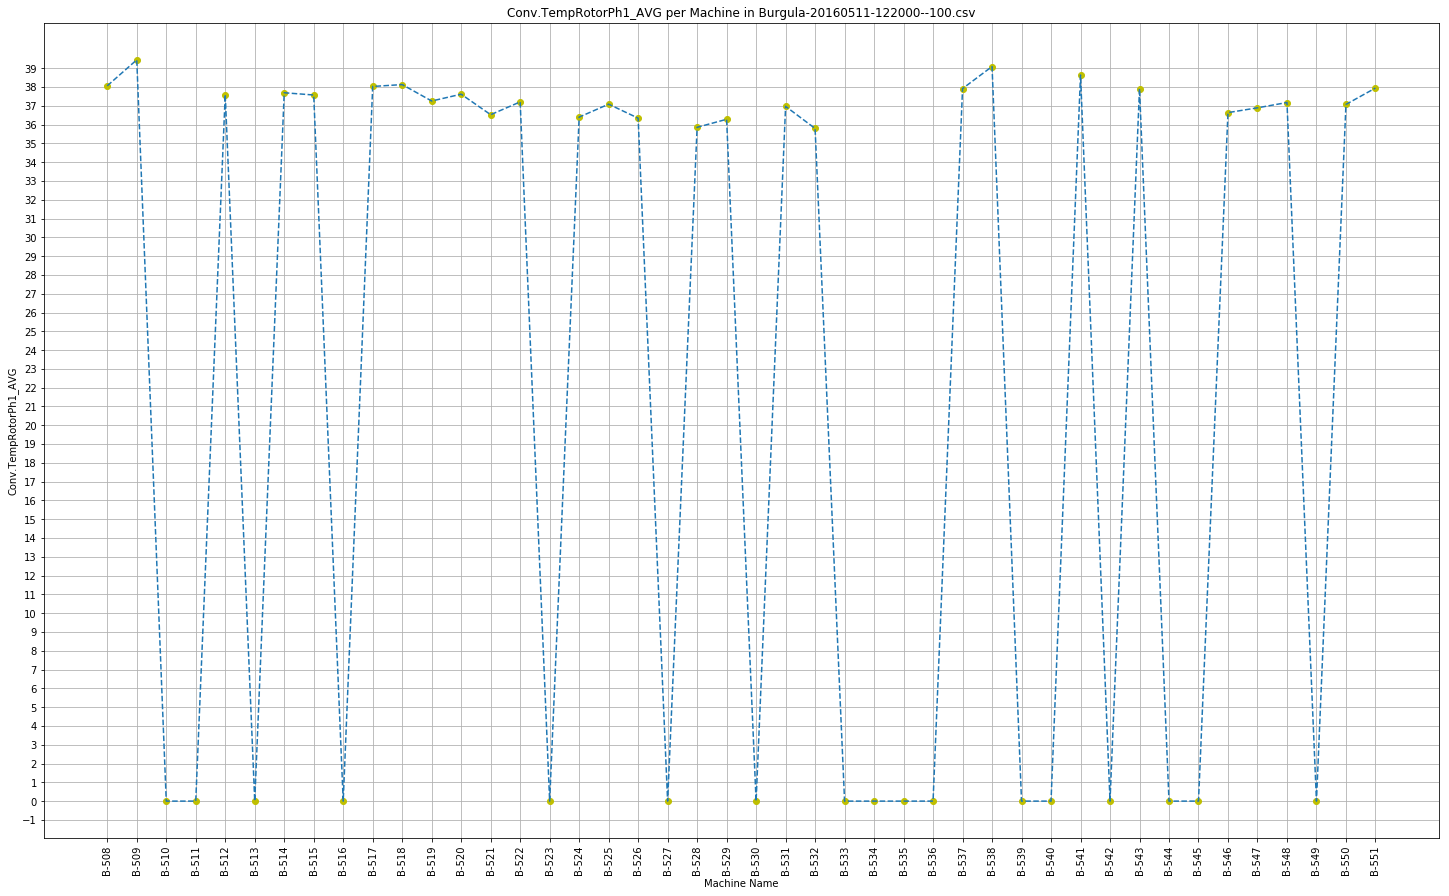

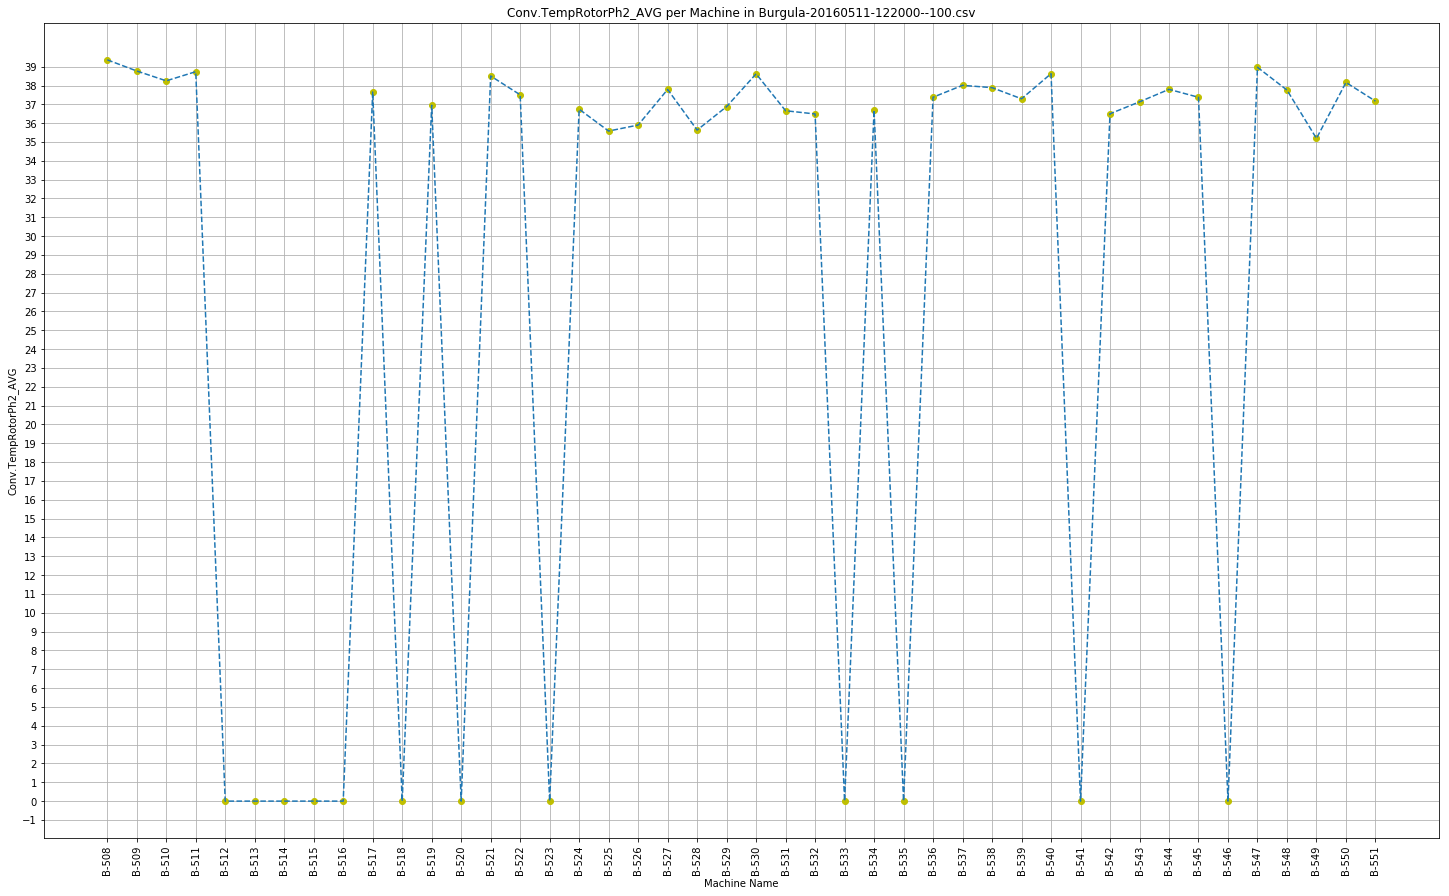

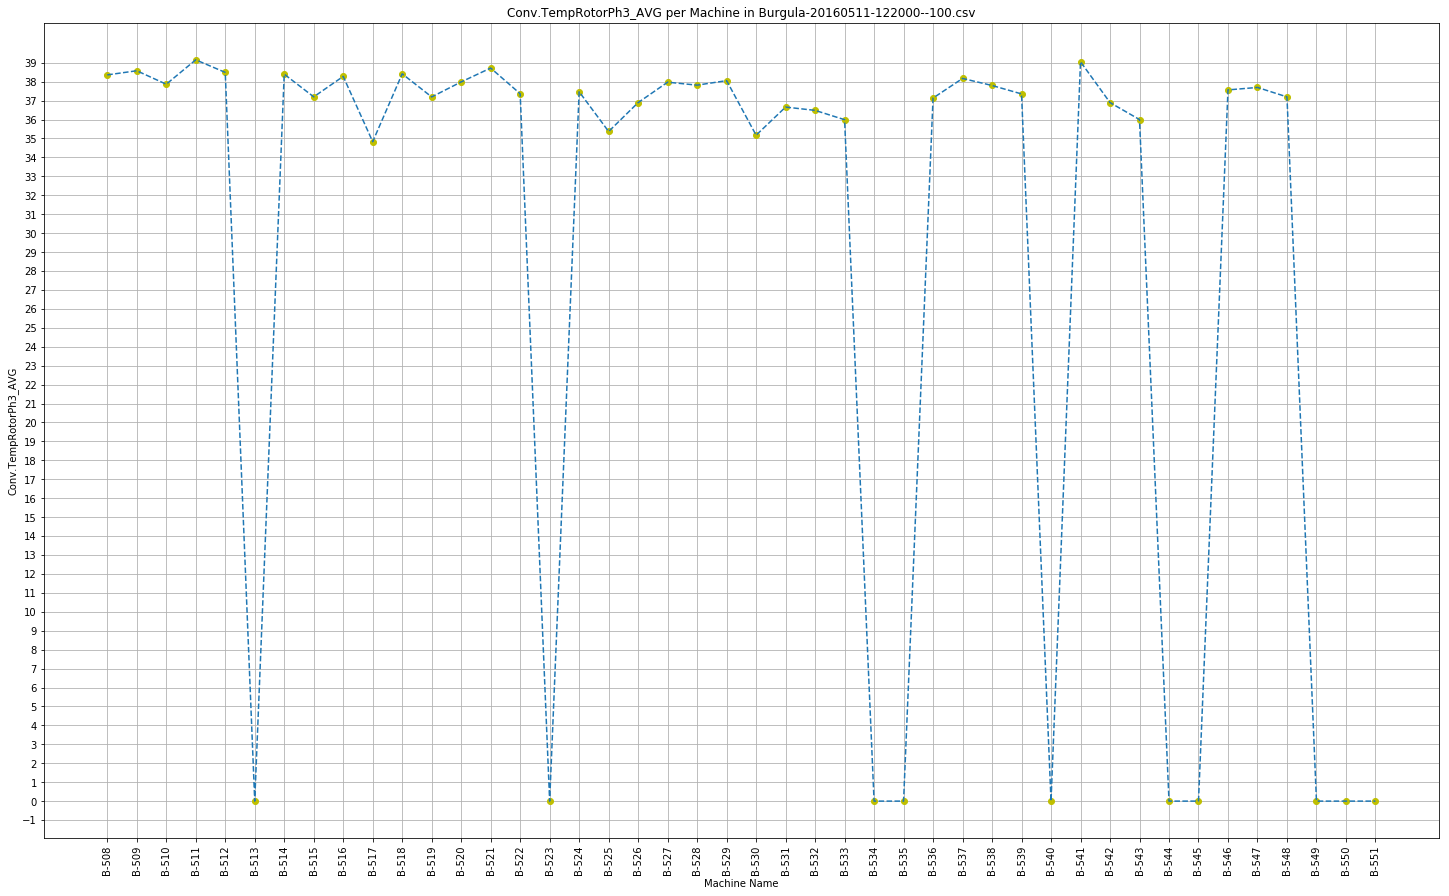

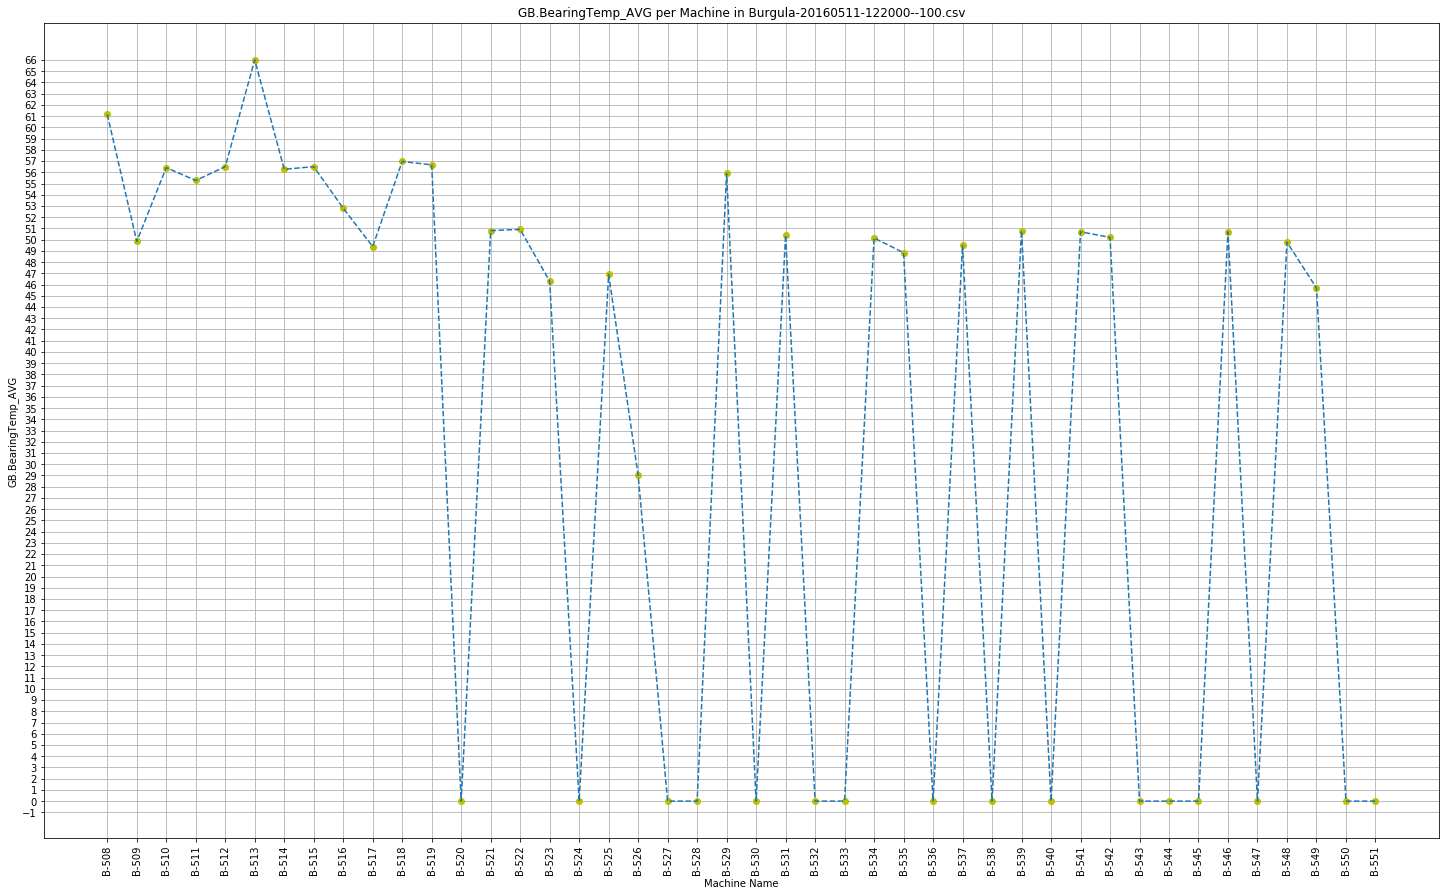

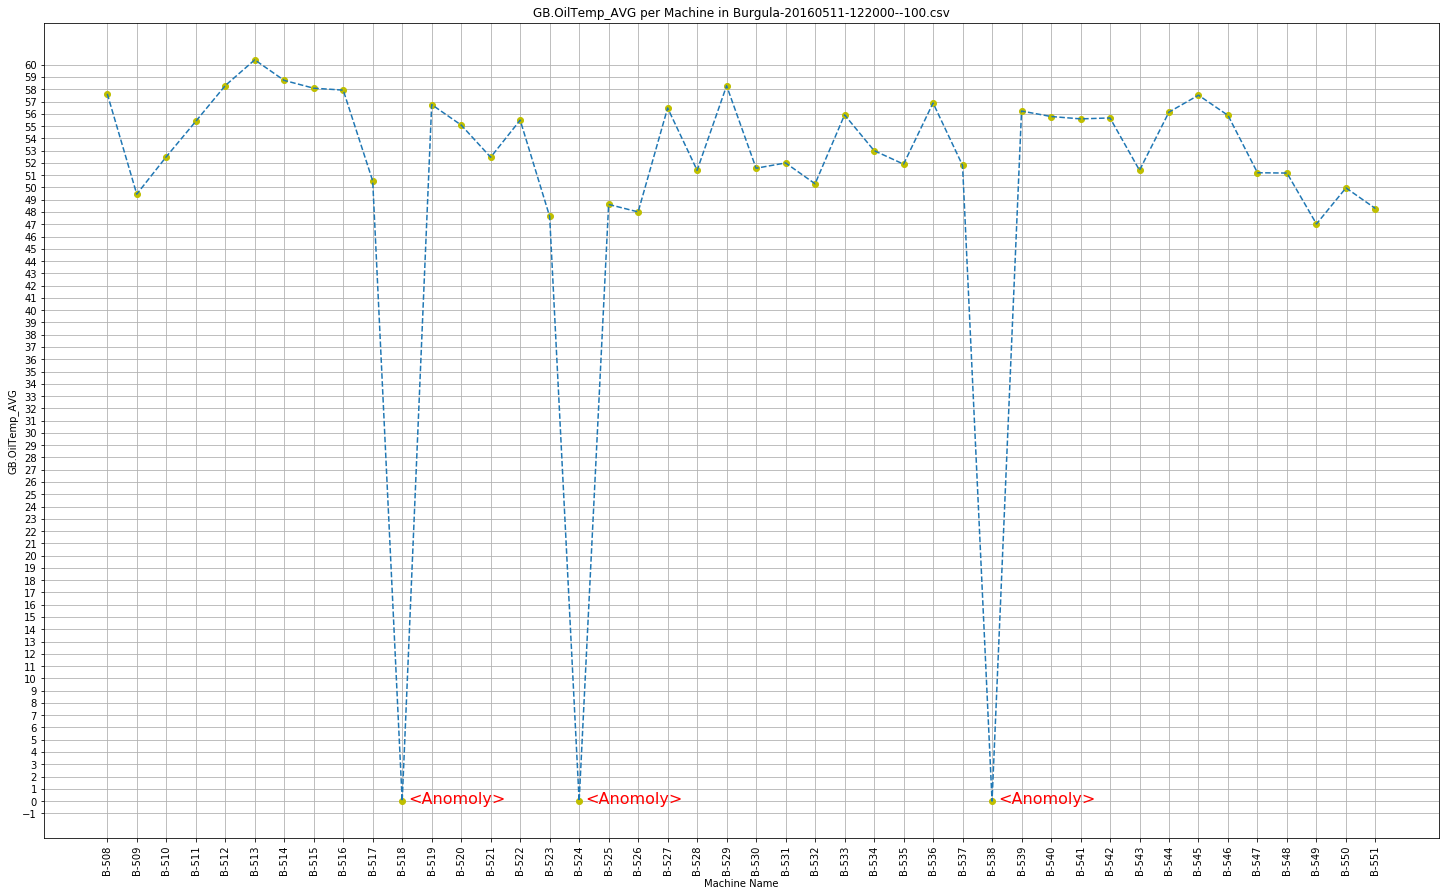

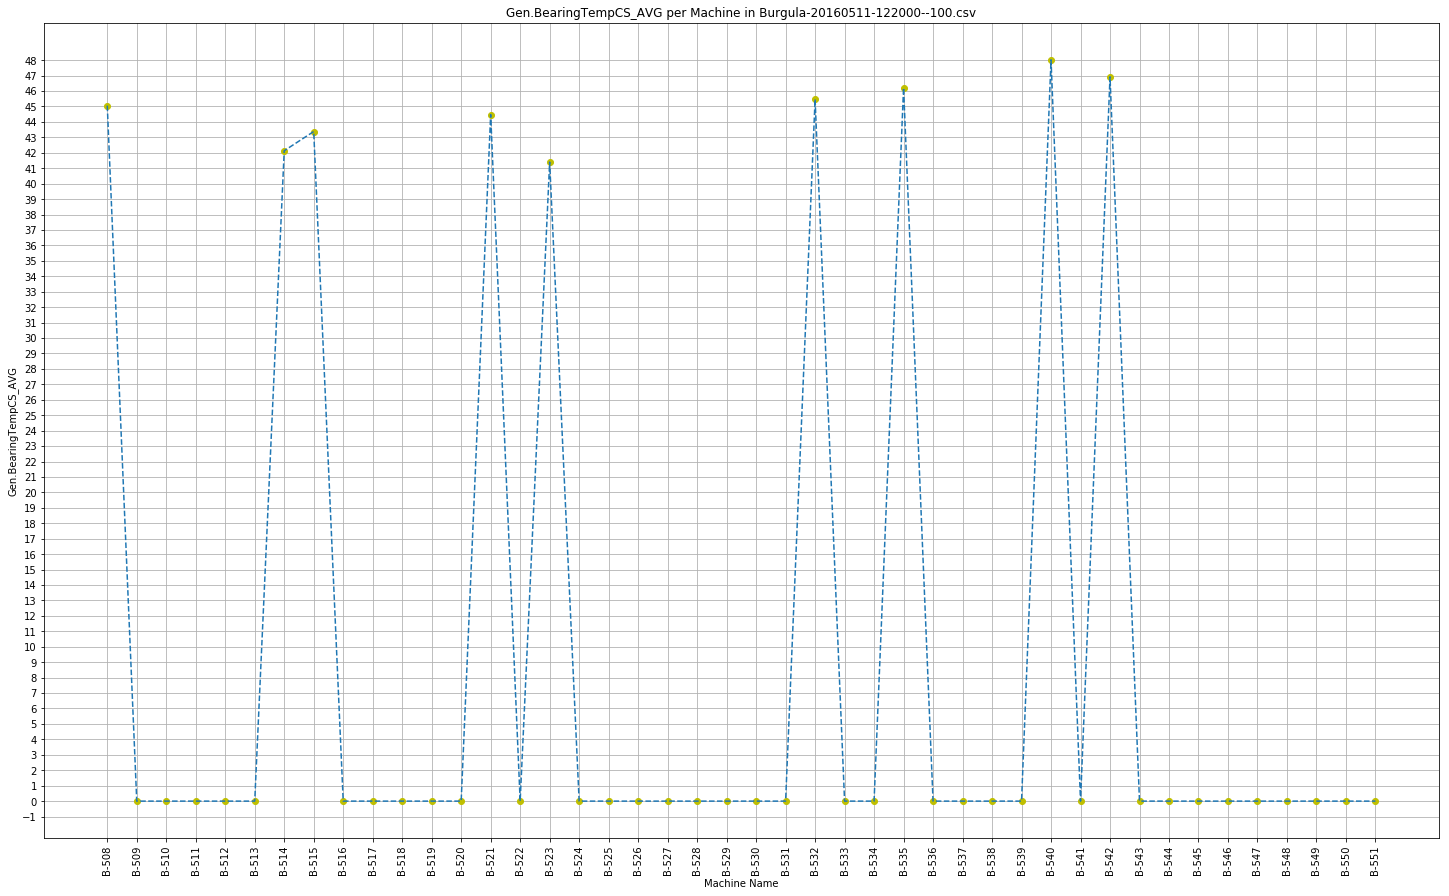

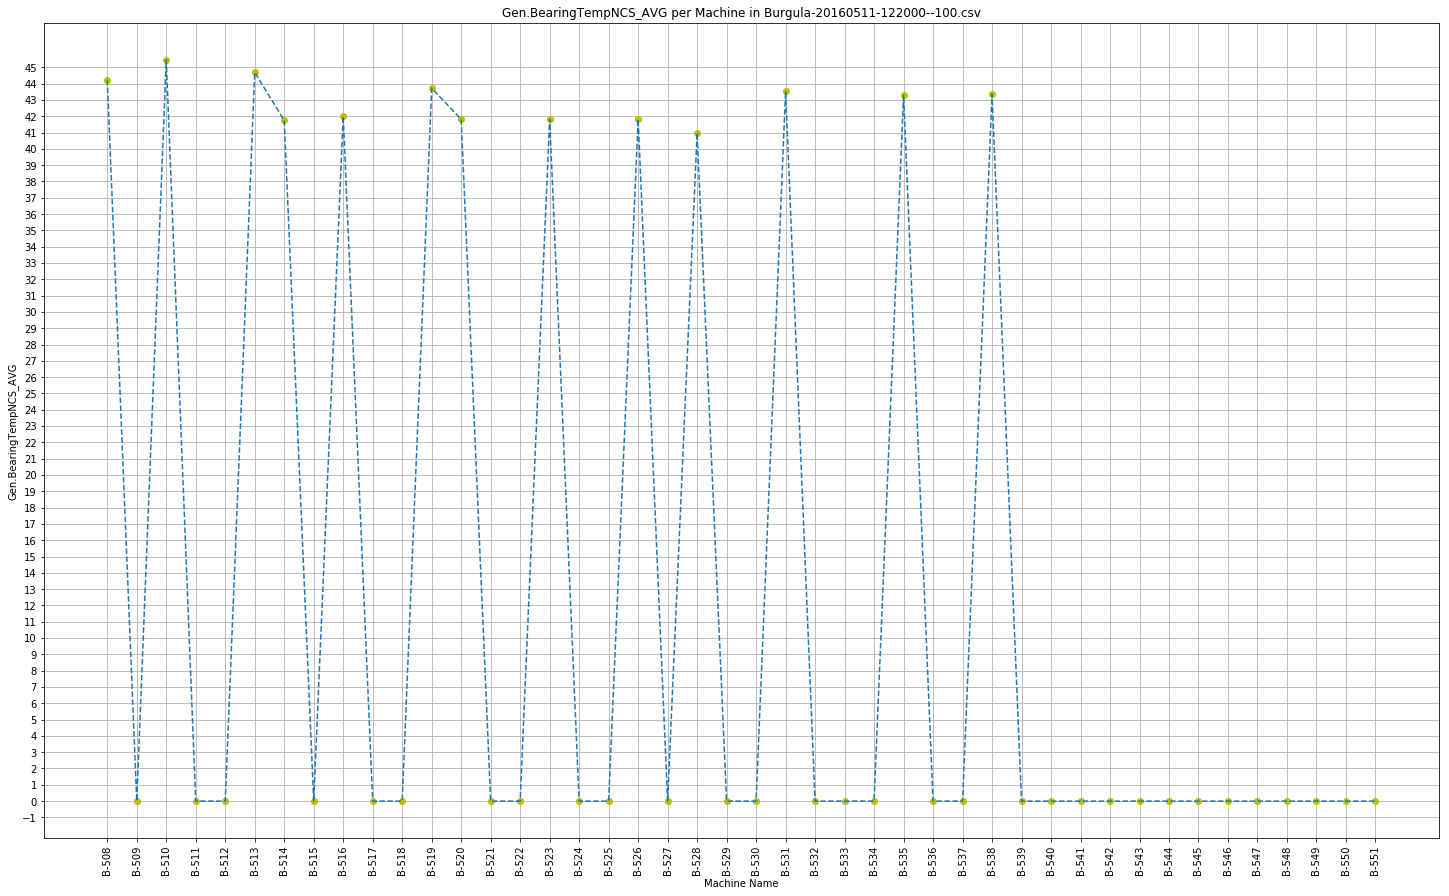

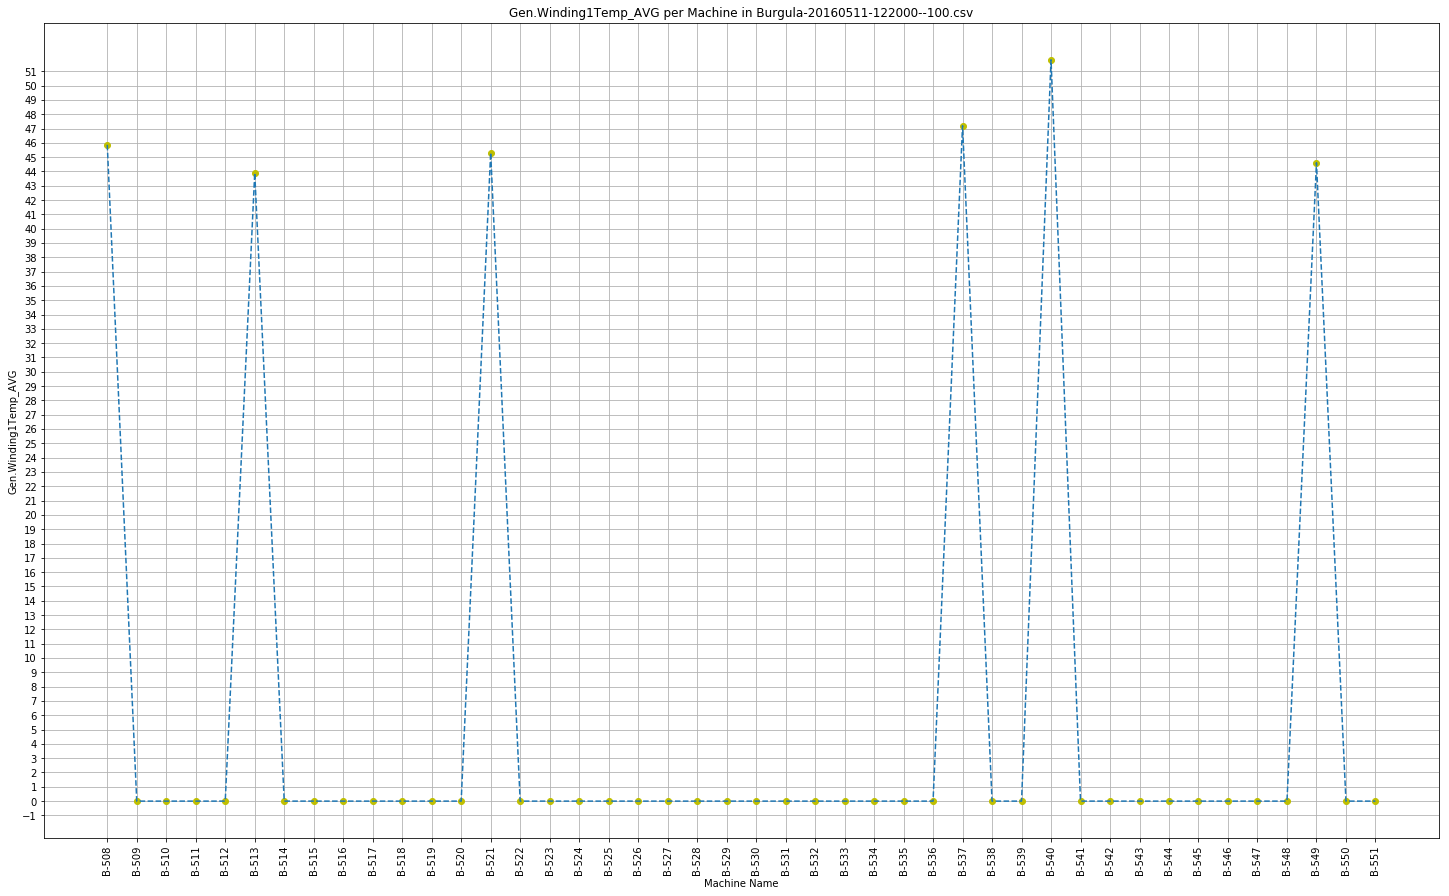

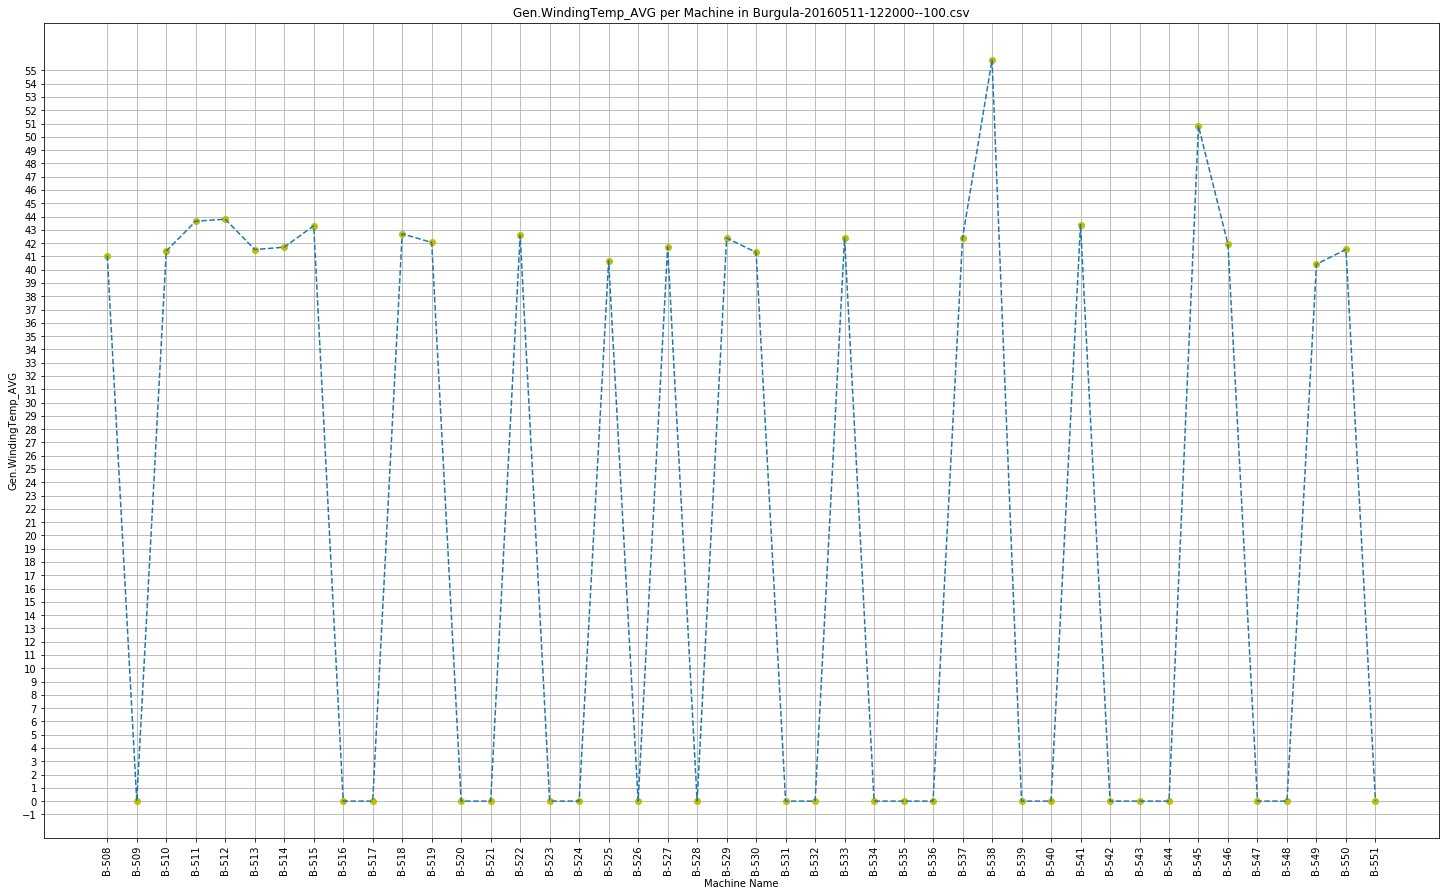

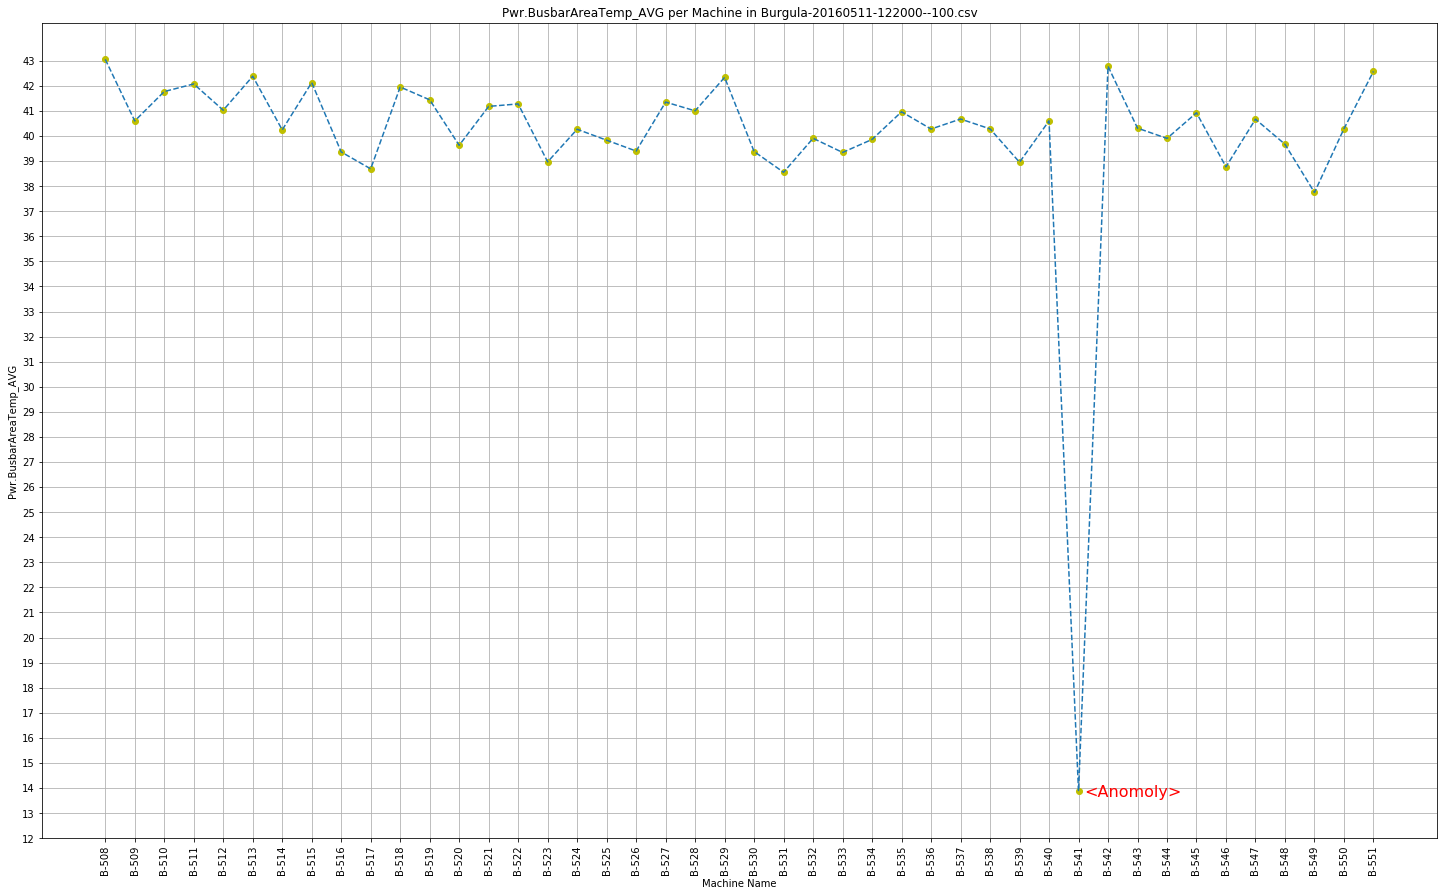

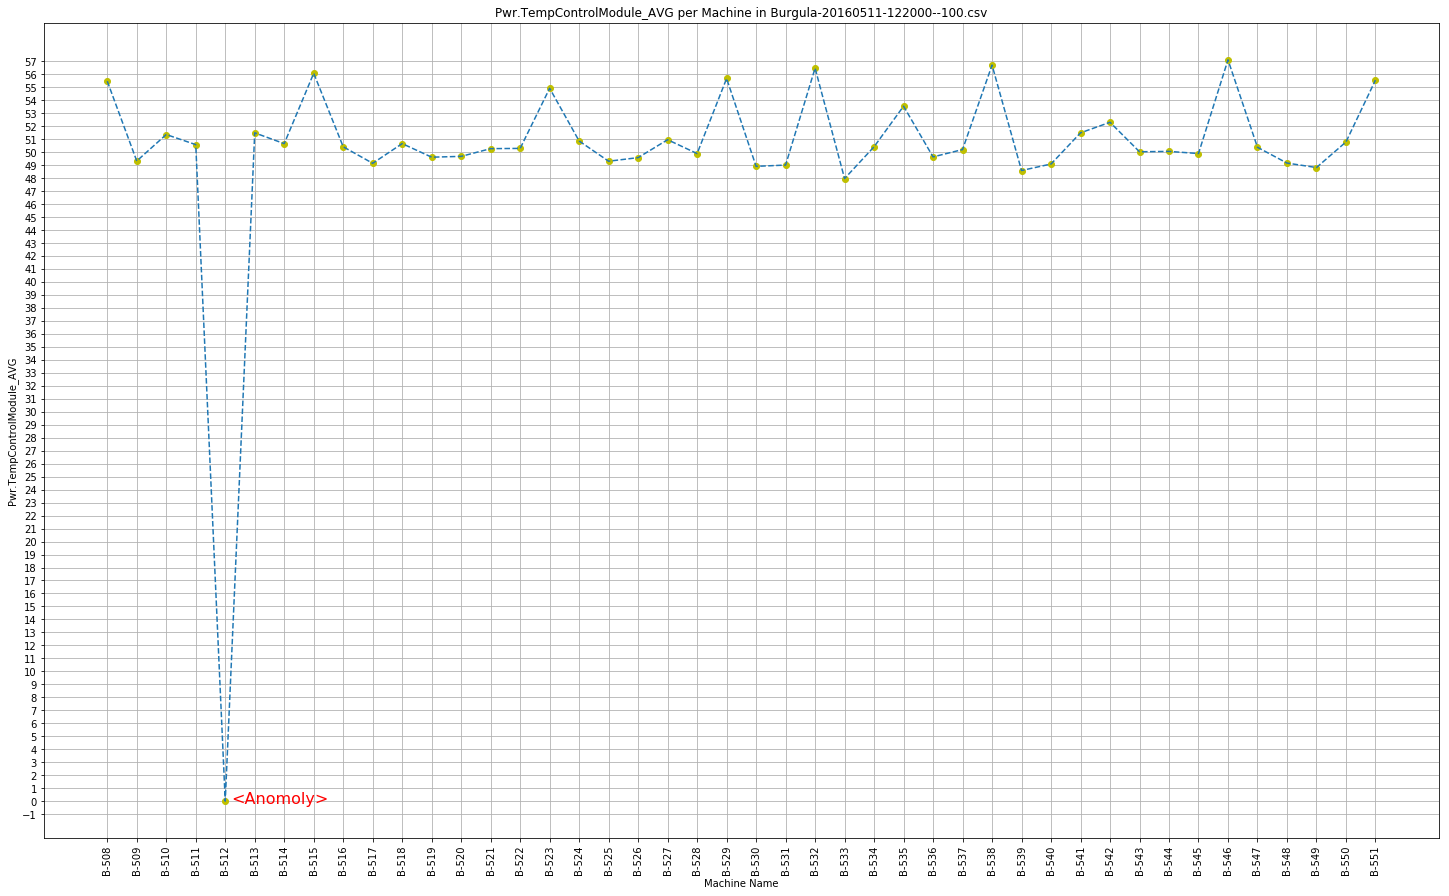

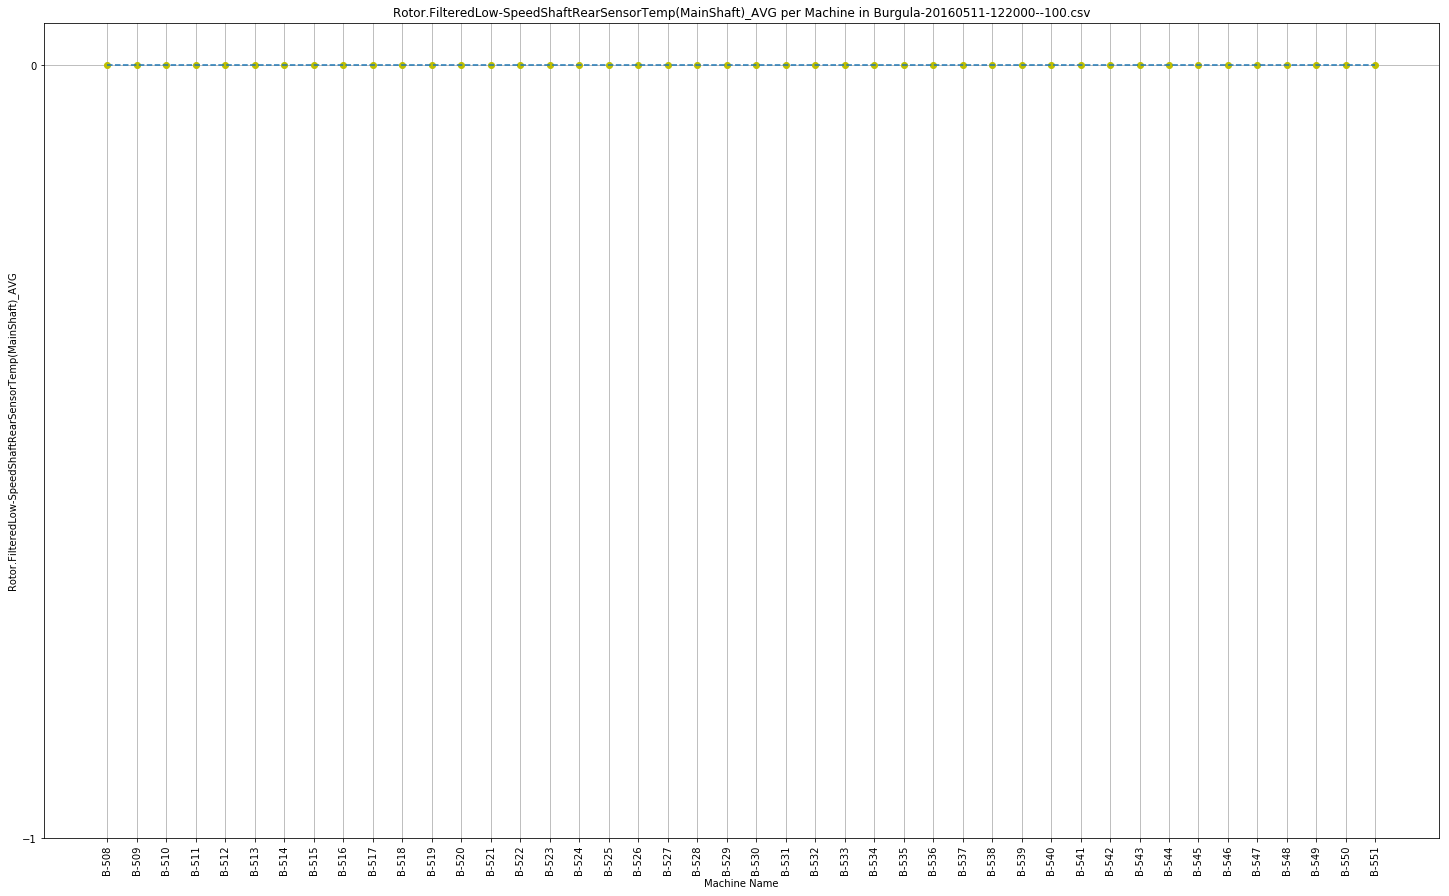

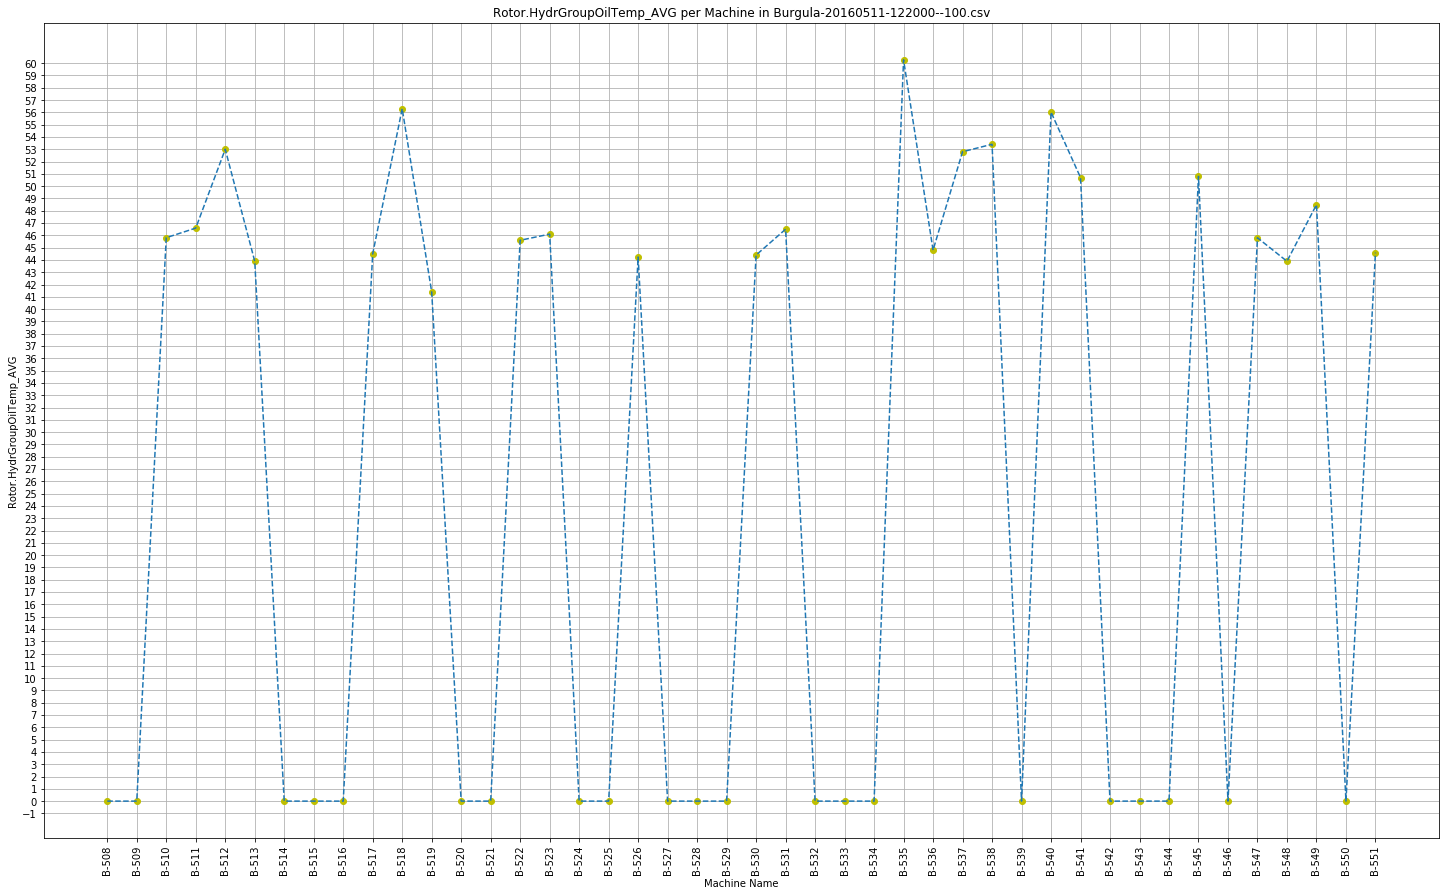

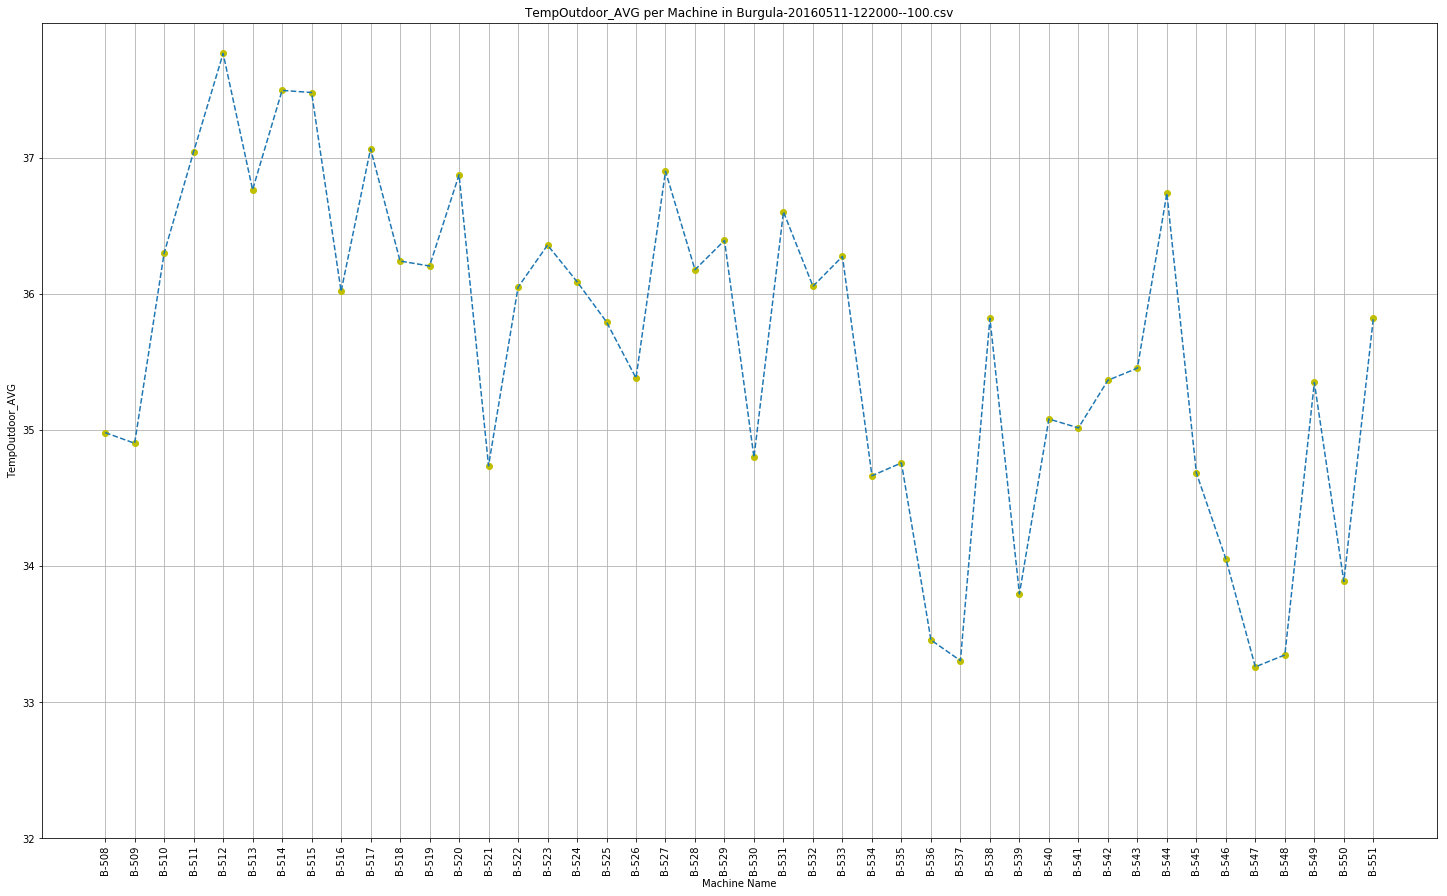

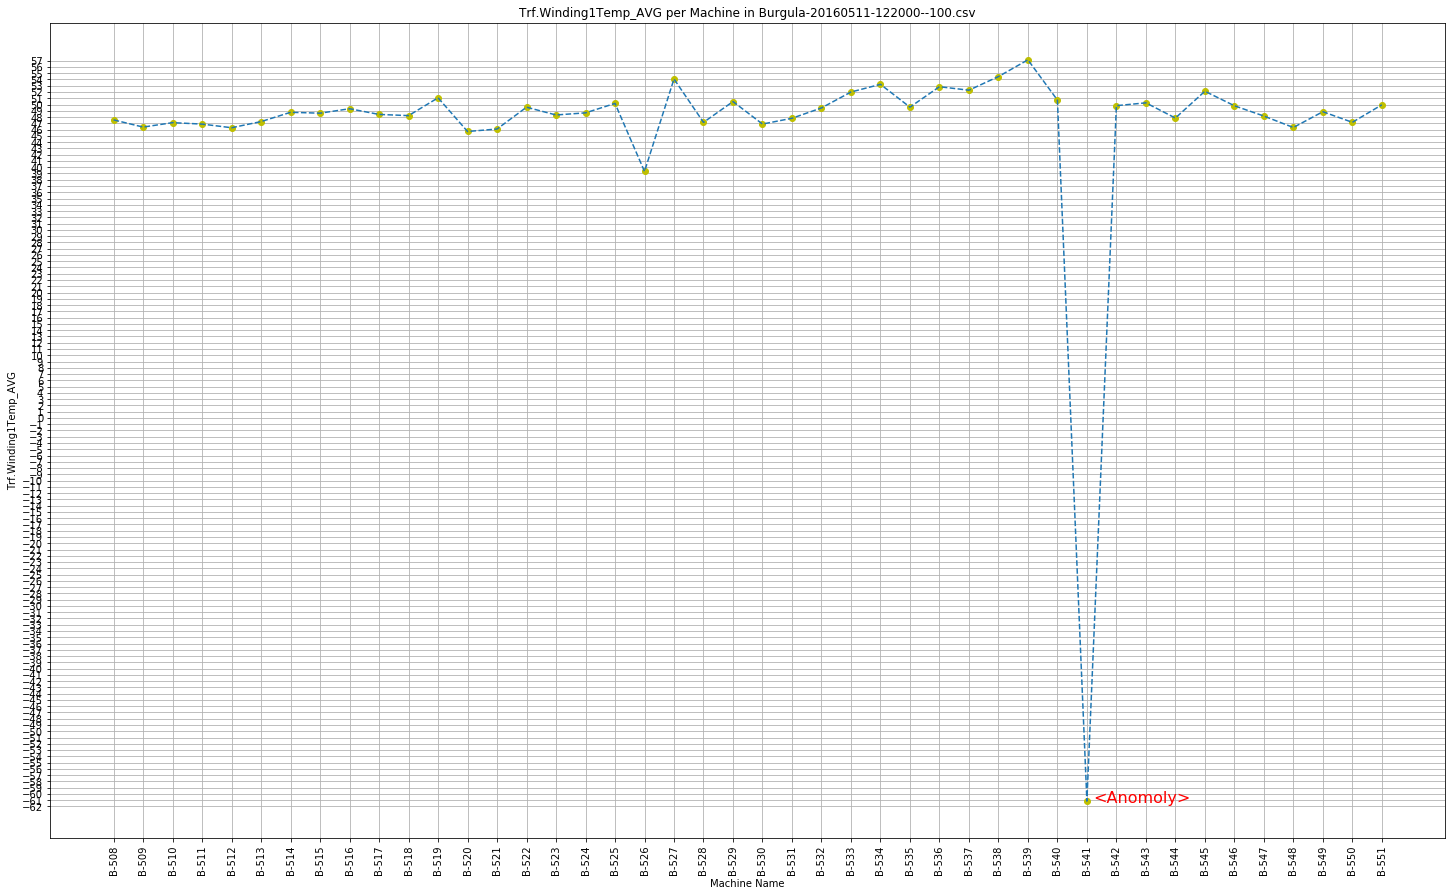

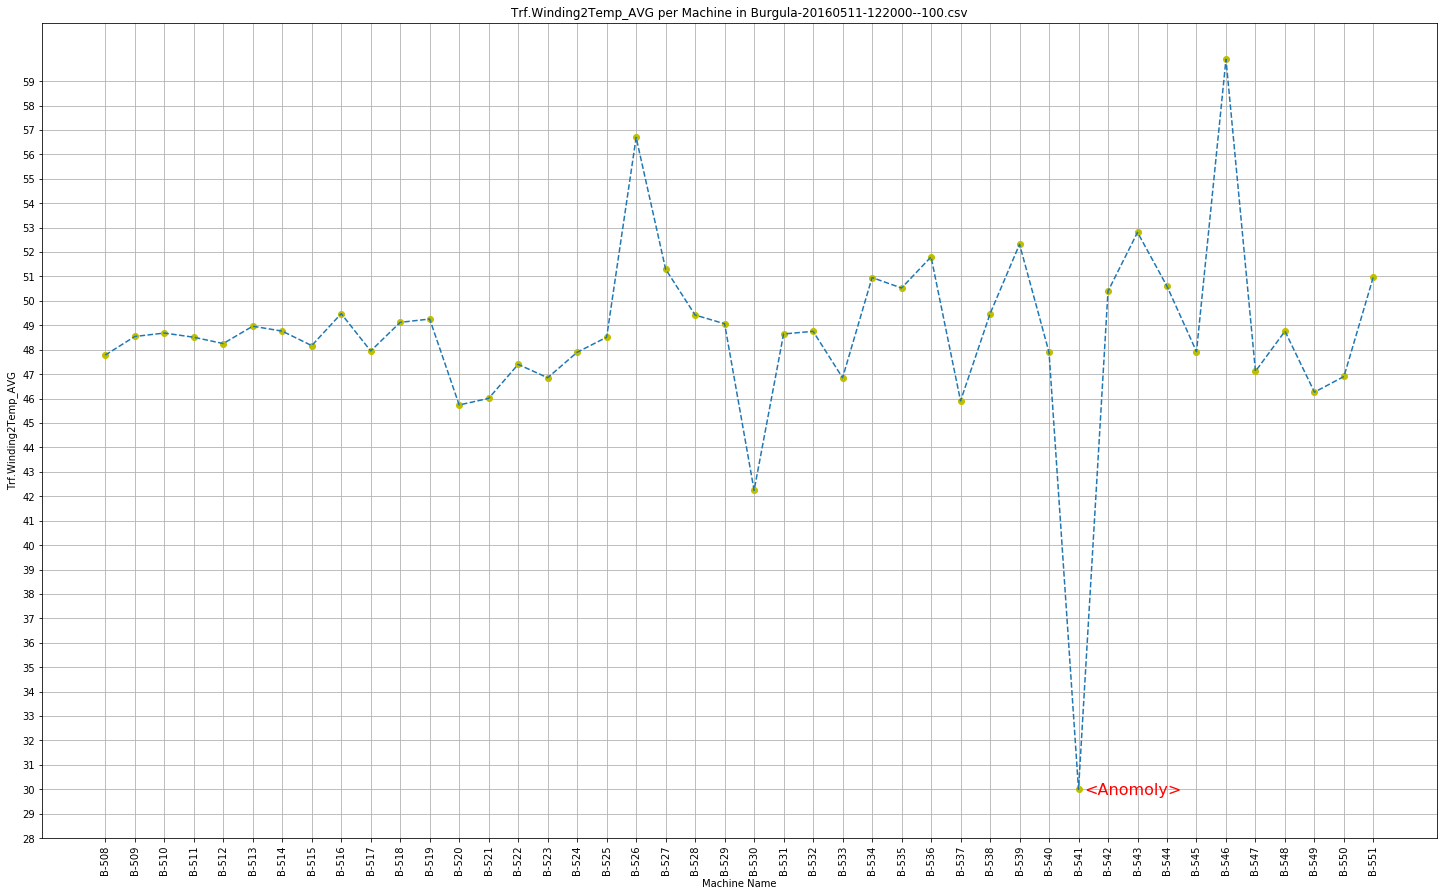

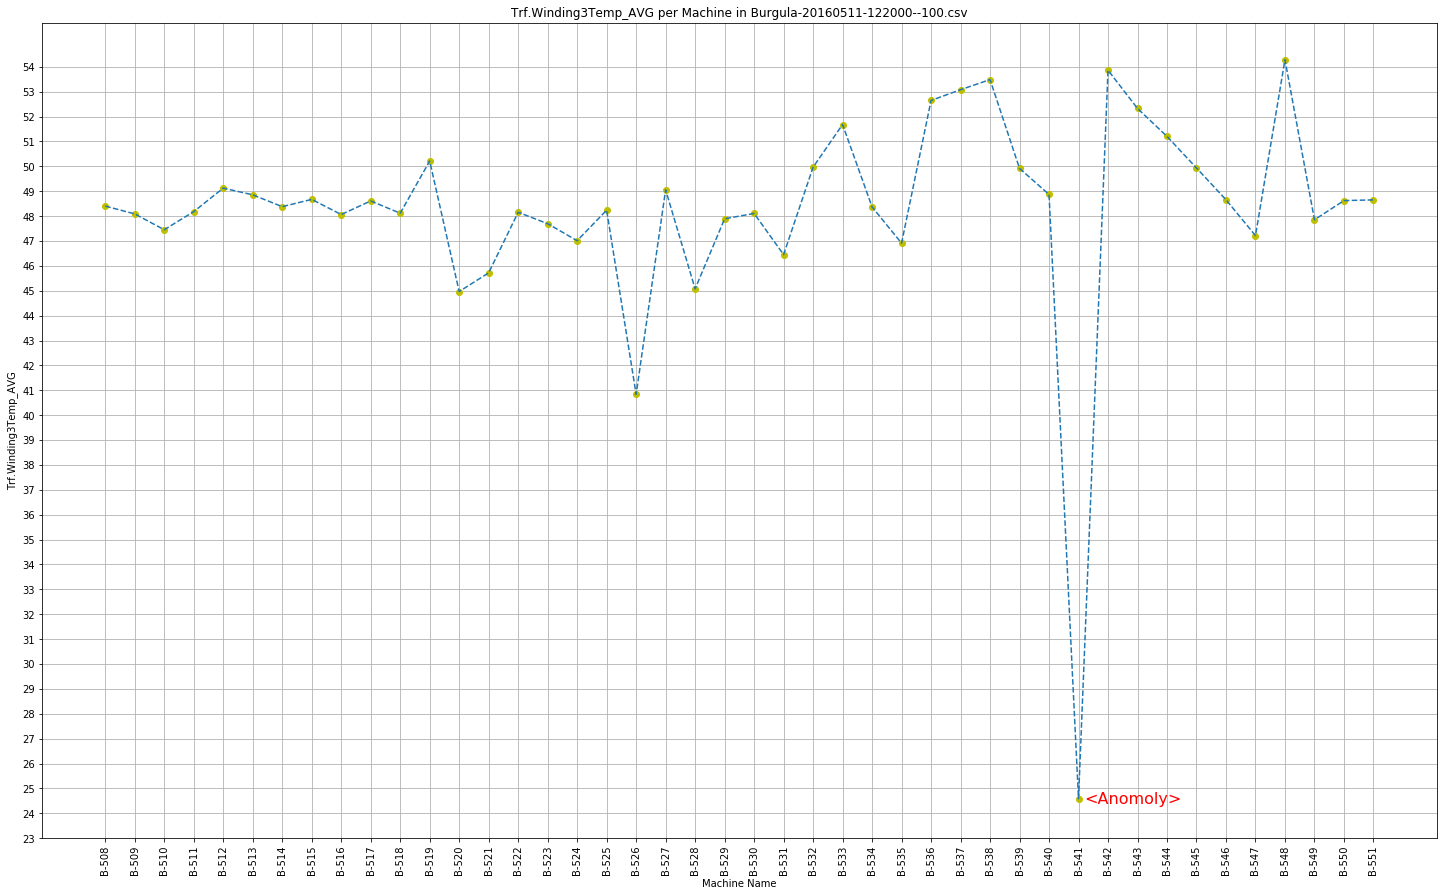

In [266]:
for column in list(required_df)[1:]:
    value_per_machine_anomolies(list(required_df[column][:-1]), list(required_df['Machine'][:-1]), column, file_name)

In [50]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']},
    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']},
    index=[0, 1, 2, 3])


df3 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B8', 'B9', 'B10', 'B11'],
    'C': ['C8', 'C9', 'C10', 'C11'],
    'D': ['D8', 'D9', 'D10', 'D11']},
    index=[0, 1, 2, 3])


df = pd.concat([df1, df2, df3]).set_index('A')
df.loc[(df.B == 'B2') & (df.D == 'D2'), 'C'] = 9
df

,B,C,D
A,,,
A0,B0,C0,D0
A1,B1,C1,D1
A2,B2,9,D2
A3,B3,C3,D3
A0,B4,C4,D4
A1,B5,C5,D5
A2,B6,C6,D6
A3,B7,C7,D7
A0,B8,C8,D8


In [13]:
import pandas as pd
mylist=['a','b','c','d','e']
df = pd.DataFrame(mylist, columns = ['test_col'])
df.ix[]

,test_col
0,a
1,b
2,c


In [21]:
x = {
    'a': 1,
    'b': 2
}

In [21]:
x.values()

NameError: name 'x' is not defined

In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.DataFrame({'code': ['foo', 'bar', 'baz'] * 2,
                    'data': [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
                   'flag': [False, True] * 3})

code_groups = df.groupby('code')

agg_n_sort_order = code_groups[['data']].transform(sum).sort_values(by='data')

sorted_df = df.loc[agg_n_sort_order.index]

In [29]:
code_groups[['data']].sum().reset_index()

,code,data
0,bar,-0.80
1,baz,0.95
2,foo,0.61
